In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import datetime

%matplotlib inline
color = sns.color_palette()

import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('G:/datasets/data.csv', encoding = 'ISO-8859-1',dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df_new = df.dropna()

In [5]:
df_new.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [6]:
df_new.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null object
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


### อัตราการยกเลิก

In [7]:
order_canceled = df_new['InvoiceNo'].apply(lambda x:int('C' in x))
n1 = order_canceled.sum()
n2 = df_new.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 8905/406829 (2.19%) 


In [8]:
df_new = df_new[df_new.Quantity > 0]

In [9]:
df_new.describe()

,Quantity,UnitPrice
count,397924.000000,397924.000000
mean,13.021823,3.116174
std,180.420210,22.096788
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [10]:
df_new['yearmonth'] = df_new['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df_new['day'] = df_new['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df_new['Weekday'] = df_new['InvoiceDate'].apply(lambda x: x.strftime('%w'))
df_new['hour'] = df_new['InvoiceDate'].apply(lambda x: x.strftime('%H'))

In [12]:
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
5,12352,Norway,85
6,12353,Bahrain,4
7,12354,Spain,58
8,12355,Bahrain,13
9,12356,Portugal,59


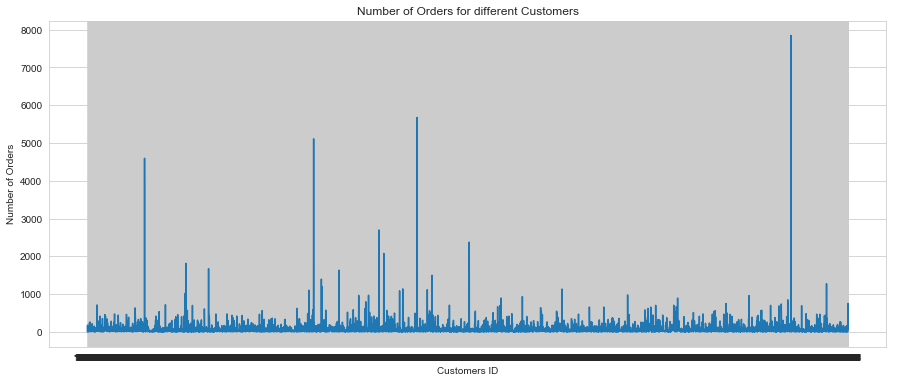

In [27]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

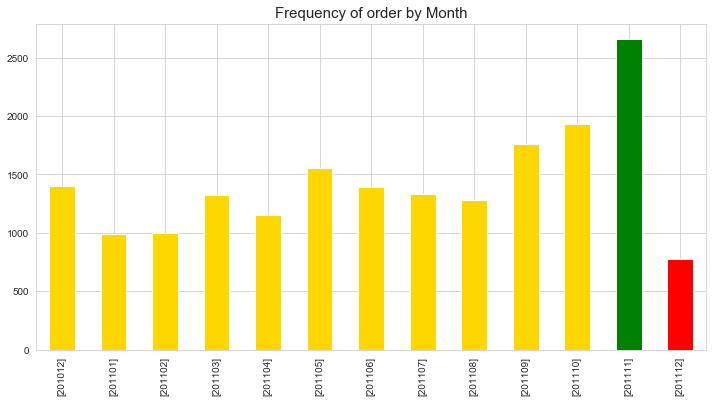

In [14]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = df_new.groupby(['InvoiceNo'])['yearmonth'].unique()
InvoiceDate.value_counts().sort_index().plot.bar(color=['gold', 'gold',
               'gold', 'gold',
               'gold','gold','gold', 'gold','gold', 'gold',
               'gold', 'g',
               'red','gold'])

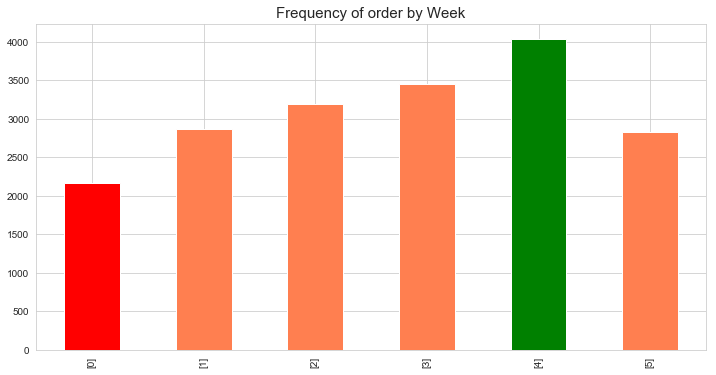

In [15]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = df_new.groupby(['InvoiceNo'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.bar(color=['red', 'coral',
               'coral','coral', 'g',
               'coral'])

#0=sunday

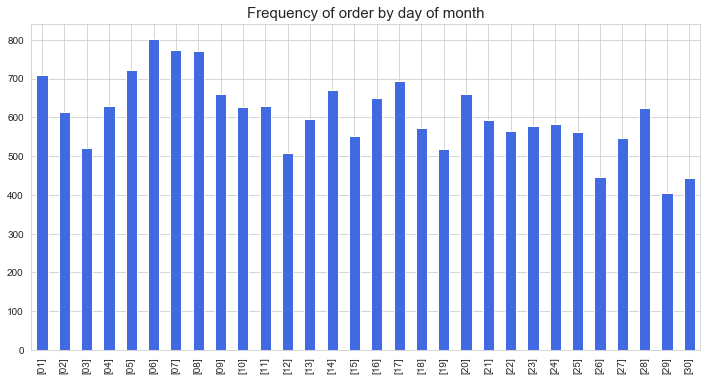

In [16]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by day of month", fontsize=15)
InvoiceDate = df_new.groupby(['InvoiceNo'])['day'].unique()
(InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar(color='royalblue')

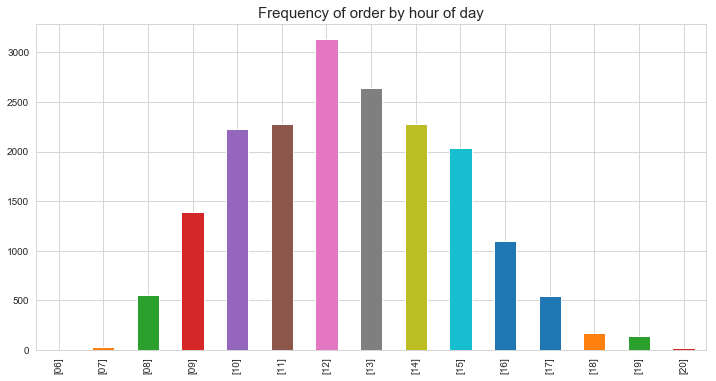

In [17]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
InvoiceDate = df_new.groupby(['InvoiceNo'])['hour'].unique()
(InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar()

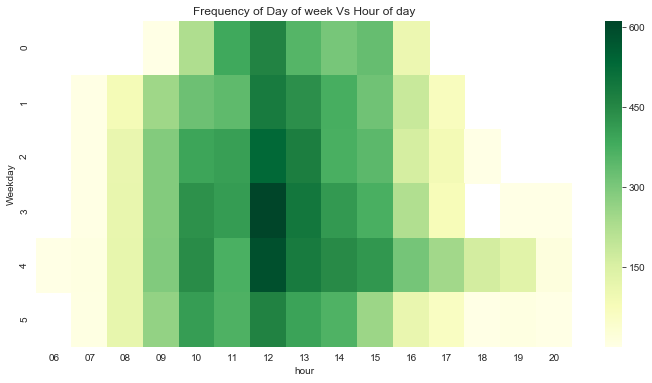

In [18]:
grouped_df  = df_new.groupby(["Weekday", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

grouped_df = grouped_df.pivot('Weekday', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df,cmap="YlGn")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [19]:
df_new['amount_spent'] = df_new['Quantity'] * df_new['UnitPrice']

In [20]:
df_new.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

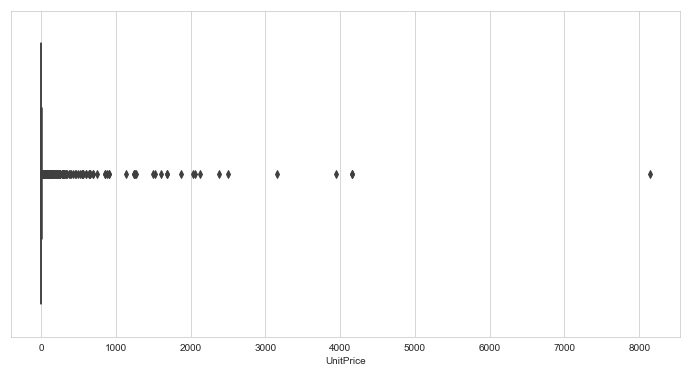

In [21]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.UnitPrice)
plt.show()

In [22]:
df_new.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,yearmonth,day,Weekday,hour,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,201012,01,3,08,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,201012,01,3,08,20.34


In [23]:
df_sort = df_new.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['StockCode'] == df_sort_shift1['StockCode'], 1,0)
df_sort_reorder.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,yearmonth,day,Weekday,hour,amount_spent,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,201101,18,2,10,77183.6,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.25,12347,Iceland,201104,07,4,10,6.0,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.30,12347,Iceland,201106,09,4,13,10.8,0
148289,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.95,12347,Iceland,201104,07,4,10,17.7,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10,2011-01-26 14:30:00,0.85,12347,Iceland,201101,26,3,14,8.5,0


In [137]:
pd.DataFrame((df_sort_reorder.groupby(['Description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1212
JUMBO BAG RED RETROSPOT,1026
REGENCY CAKESTAND 3 TIER,1018
LUNCH BAG RED RETROSPOT,827
POSTAGE,817
ASSORTED COLOUR BIRD ORNAMENT,739
PARTY BUNTING,708
LUNCH BAG BLACK SKULL.,668
LUNCH BAG SUKI DESIGN,637


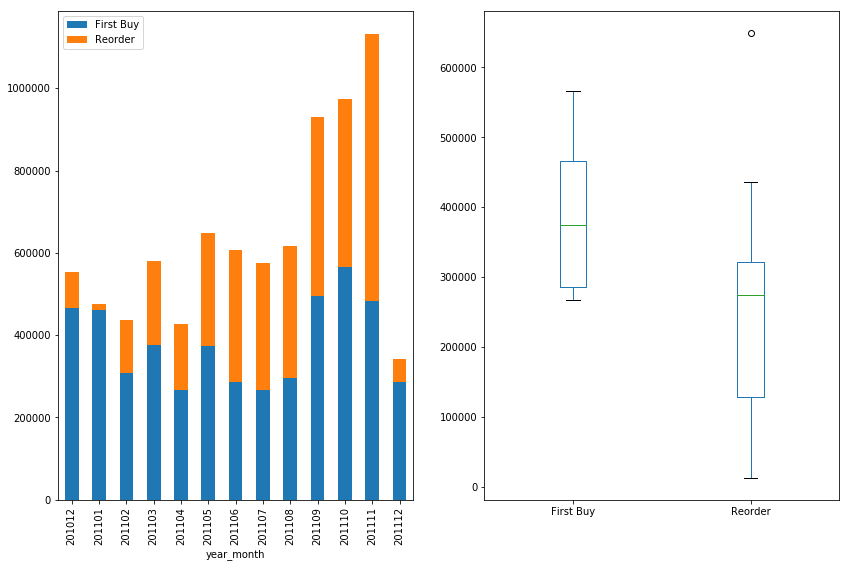

In [138]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['year_month'])['amount_spent'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['year_month'])['amount_spent'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

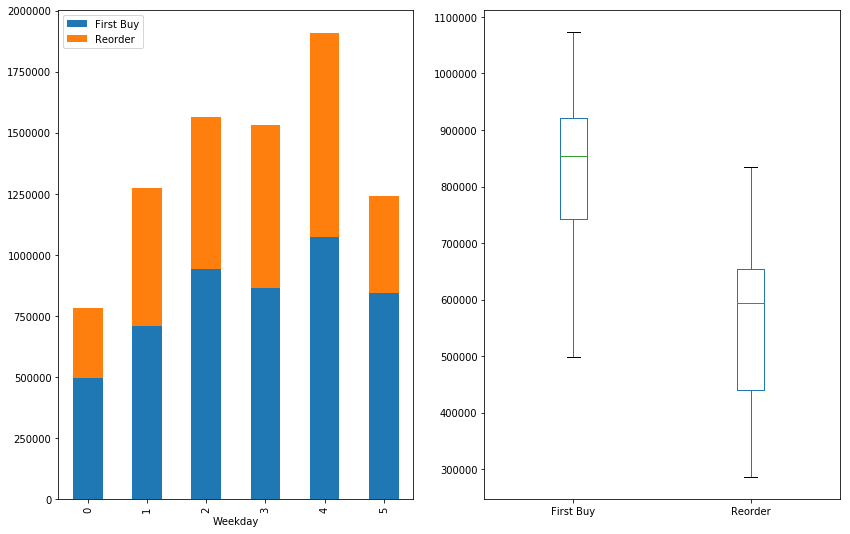

In [144]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['Weekday'])['amount_spent'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['Weekday'])['amount_spent'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

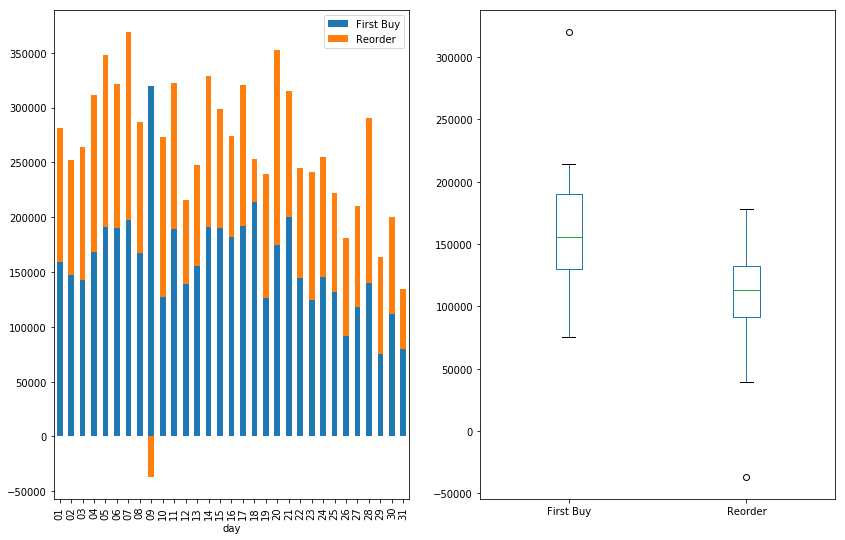

In [142]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['day'])['amount_spent'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['day'])['amount_spent'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

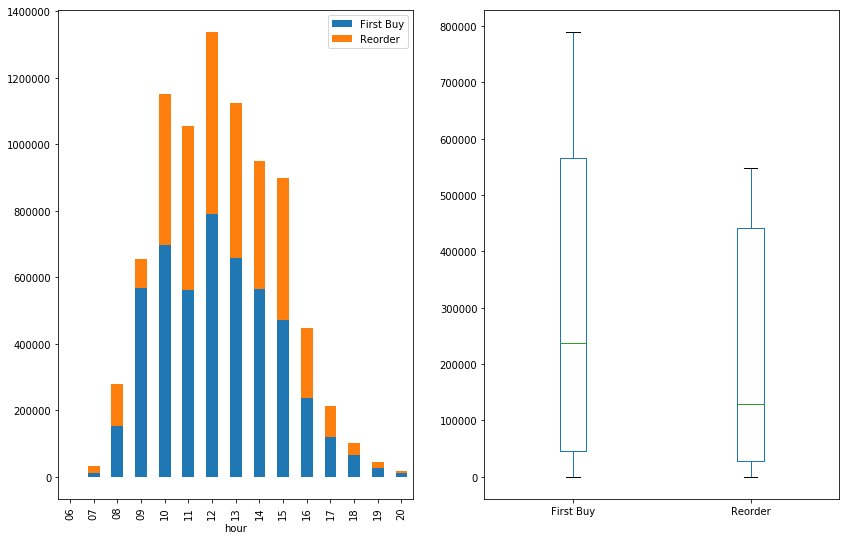

In [141]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['hour'])['amount_spent'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['hour'])['amount_spent'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])